In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Display Settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [3]:
df=pd.read_csv("german_credit_data.csv")

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
#Gives Average Minmum and Maximum Age & Credit amount
df[["Age", "Credit amount"]].describe().round(2)

,Age,Credit amount
count,1000.00,1000.00
mean,35.55,3271.26
std,11.38,2822.74
min,19.00,250.00
25%,27.00,1365.50
50%,33.00,2319.50
75%,42.00,3972.25
max,75.00,18424.00


In [6]:
#Counting risk value count
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [7]:
df.shape

(1000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df["Job"].unique()

array([2, 1, 3, 0])

In [11]:
df.isna().sum

<bound method DataFrame.sum of      Unnamed: 0    Age    Sex    Job  Housing  Saving accounts  \
0         False  False  False  False    False             True   
1         False  False  False  False    False            False   
2         False  False  False  False    False            False   
3         False  False  False  False    False            False   
4         False  False  False  False    False            False   
..          ...    ...    ...    ...      ...              ...   
995       False  False  False  False    False            False   
996       False  False  False  False    False            False   
997       False  False  False  False    False            False   
998       False  False  False  False    False            False   
999       False  False  False  False    False            False   

     Checking account  Credit amount  Duration  Purpose   Risk  
0               False          False     False    False  False  
1               False          False     False

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df=df.dropna().reset_index(drop=True)

In [14]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [15]:
#1000-522=478 rows dropped.

In [16]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [17]:
df.drop(columns='Unnamed: 0', inplace= True)

In [18]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

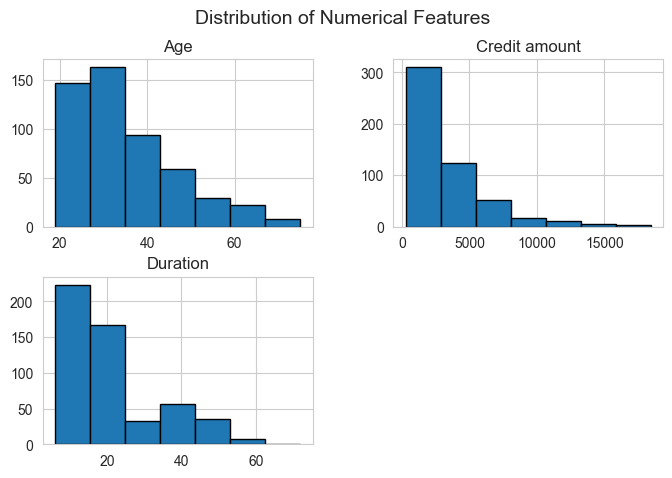

In [19]:
#Histogram
df[["Age", "Credit amount", "Duration"]].hist(
    bins=7,
    edgecolor="black",
    figsize=(8, 5)
)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

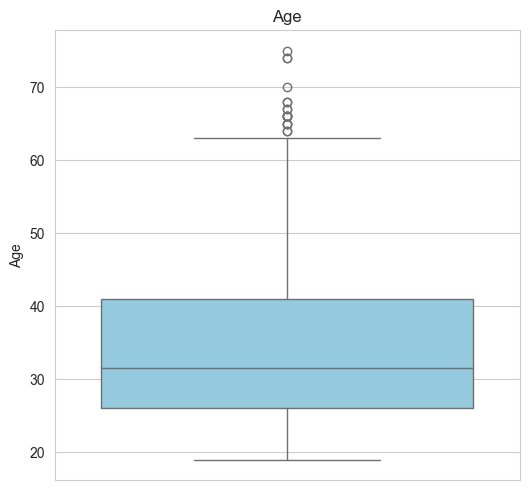

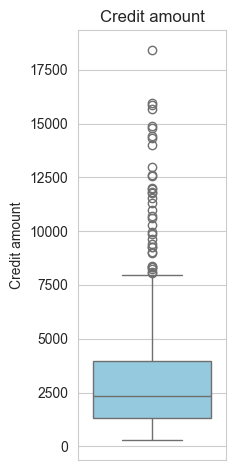

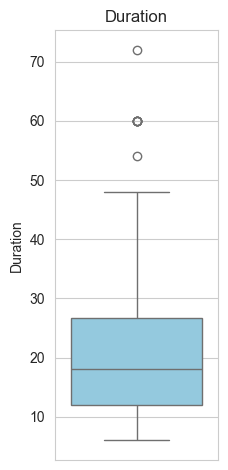

In [20]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

    plt.tight_layout()
    plt.show()

In [21]:
df.query("Duration >=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [22]:
categorical_cols=["Sex","Job","Housing","Saving accounts", "Checking account","Purpose"]

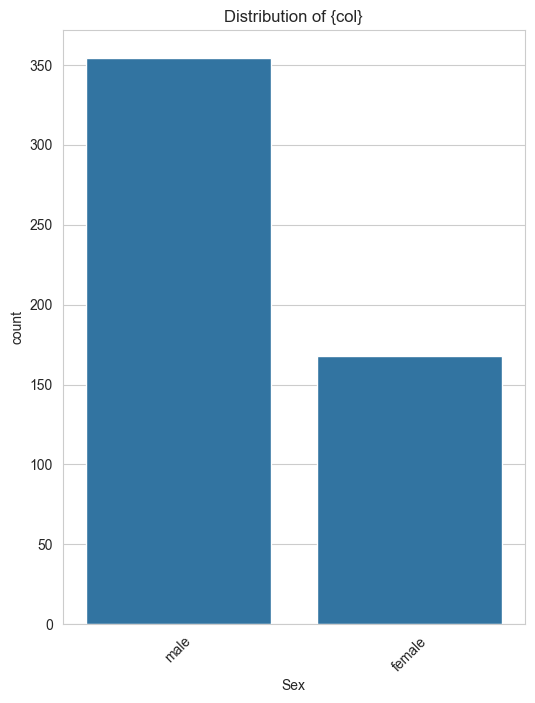

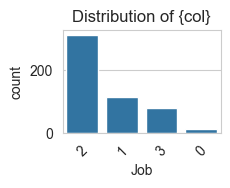

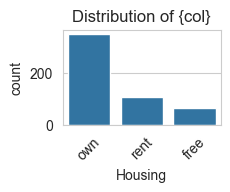

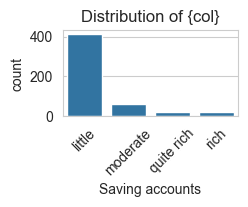

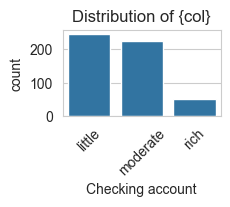

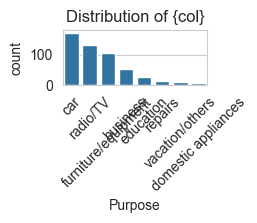

In [23]:
plt.figure(figsize= (15,20))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col, order=df[col].value_counts().index)
    plt.title("Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [24]:
corr= df[["Age", "Job", "Credit amount", "Duration"]].corr()

In [25]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


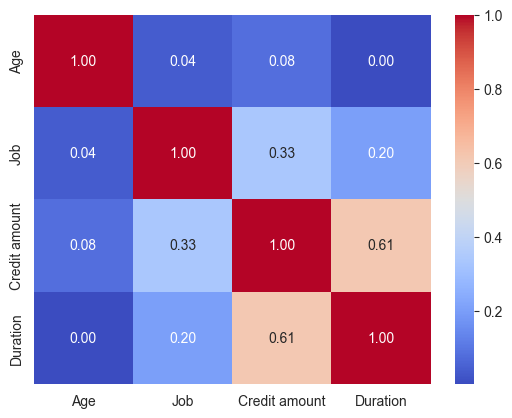

In [26]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [27]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [28]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [29]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


Text(0.5, 1.0, 'Credit amount vs Age colored by Sex & sized by Duration')

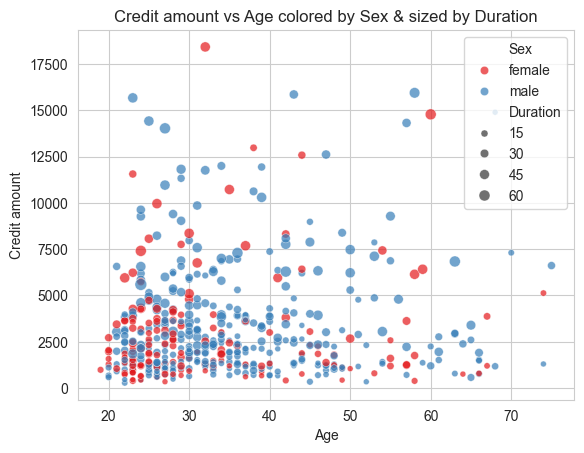

In [30]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Credit amount vs Age colored by Sex & sized by Duration")

C:\Users\zaeem\AppData\Local\Temp\ipykernel_3704\1038748578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")


Text(0.5, 1.0, 'Credit Amount Distribution by Saving Account')

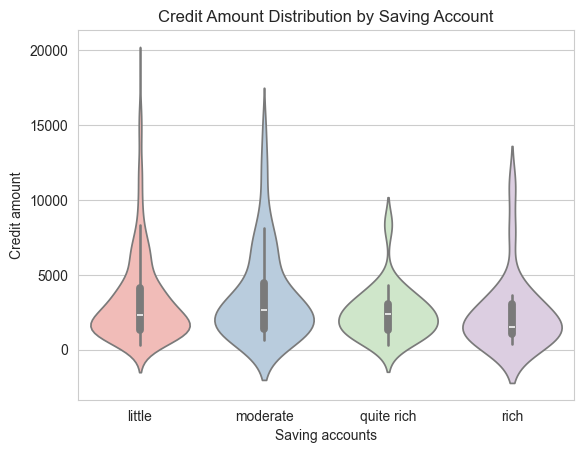

In [31]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution by Saving Account")

In [32]:
df["Risk"].value_counts(normalize= True)*100 #percentage Good and bad

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

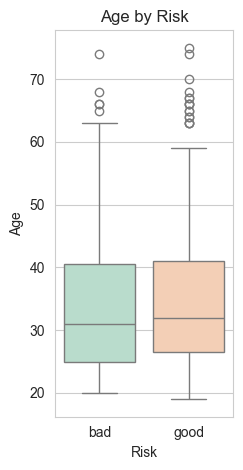

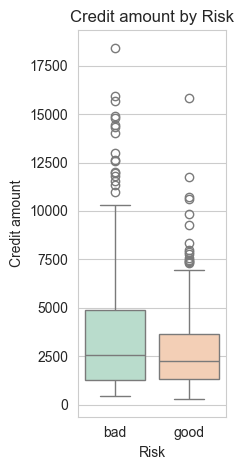

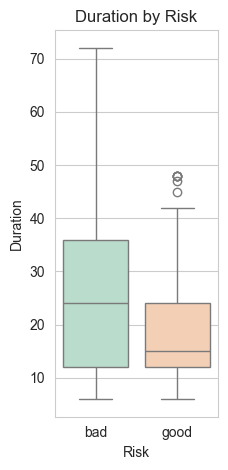

In [33]:
for i,col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data= df,x="Risk", y=col,hue="Risk", palette="Pastel2",legend=False)
    plt.title(f"{col} by Risk")
    plt.tight_layout()
    plt.show()

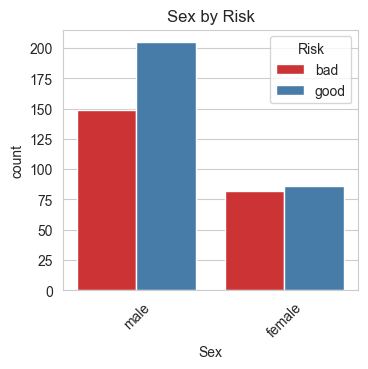

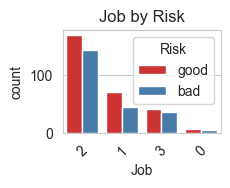

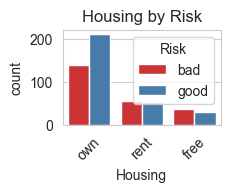

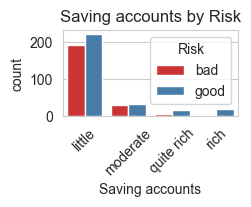

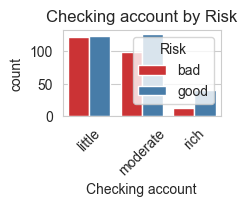

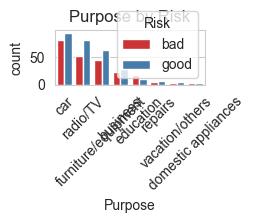

In [34]:
plt.figure(figsize= (10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue="Risk", palette="Set1", order=df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
features=["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [36]:
target="Risk"

In [37]:
df_model=df[features+[target]].copy()

In [38]:
df_model.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad
5,25,female,2,rent,little,moderate,1295,12,bad
6,24,female,2,rent,little,little,4308,48,bad
7,22,female,2,own,little,moderate,1567,12,good
8,60,male,1,own,little,little,1199,24,bad
9,28,female,2,rent,little,little,1403,15,good


In [39]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [40]:
cat_cols = df_model.select_dtypes(include ="object").columns.drop("Risk")

In [41]:
le_dict={}

In [42]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [43]:

for col in cat_cols:
    le = LabelEncoder()     
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col]=le
    joblib.dump(le, f"{col}_encoder.pkl")

In [44]:
le_target=LabelEncoder()


In [45]:
target

'Risk'

In [46]:
df_model[target]=le_target.fit_transform(df_model[target])

In [47]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [48]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [49]:
df_model.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0
5,25,0,2,2,0,1,1295,12,0
6,24,0,2,2,0,0,4308,48,0
7,22,0,2,1,0,1,1567,12,1
8,60,1,1,1,0,0,1199,24,0
9,28,0,2,2,0,0,1403,15,1


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x=df_model.drop(target, axis=1)

In [52]:
y=df_model[target]

In [53]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [54]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [56]:
x_train.shape

(417, 8)

In [57]:
x_test.shape

(105, 8)

In [58]:
!pip install xgboost

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [60]:
def train_model(model,param_grid,x_train,y_train,x_test,y_test):
    grid=GridSearchCV(model,param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(x_train,y_train)
    best_model=grid.best_estimator_
    y_pred=best_model.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    return best_model,acc,grid.best_params_

In [61]:
dt = DecisionTreeClassifier(
    random_state=1,
    class_weight="balanced"   # also correct parameter name
)

dt_param_ = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [62]:
best_dt,acc_dt,params_dt=train_model(dt,dt_param_,x_train,y_train,x_test,y_test)

In [63]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.580952380952381


In [64]:
print("best parameters", params_dt)

best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [65]:
rf= RandomForestClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

In [66]:
rf_param_grid={
    "n_estimators": [100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [67]:
best_rf, acc_rf, params_rf = train_model(
    rf,
    rf_param_grid,
    x_train,
    y_train,
    x_test,
    y_test
)

In [68]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.6190476190476191


In [69]:
print("Best params", params_rf)

Best params {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [78]:
et = ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)

In [79]:
et_param_grid={
    "n_estimators": [100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [80]:
best_et,acc_et,params_et=train_model(et,et_param_grid,x_train,y_train,x_test,y_test)

In [81]:
print("Extra trees accuracy", acc_et)

Extra trees accuracy 0.6476190476190476


In [82]:
print("Best params", params_et)

Best params {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [83]:
xgb =XGBClassifier(random_state=1,scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(), use_label_encoder=False,eval_metric="logloss")

In [84]:
xgb_param_grid={
    "n_estimators":[100,200],
    "max_depth":[3,5,7],
    "learning_rate":[0.01,0.1,0.2],
    "subsample":[0.7,1],
    "colsample_bytree":[0.7,1]
}

In [85]:
best_xgb,acc_xgb,params_xgb=train_model(xgb,xgb_param_grid,x_train,y_train,x_test,y_test)

D:\python_practice\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [86]:
print("XGB accuracy", acc_xgb)

XGB accuracy 0.6761904761904762


In [89]:
print("Best params", params_xgb)

Best params {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [90]:
joblib.dump(best_et,"extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']